## [IBM-IISc Workshop on Quantum Computing and Hybrid Clouds](http://iihcl.iisc.ac.in/quantum_workshop_2022.html)

Day 1: Qiskit Runtime (Libraries and Applications Walkthrough)

Presenter: [Rajiv Sangle](https://www.linkedin.com/in/rajiv-sangle/)

Affiliations: 
* IISc Bengaluru (MTech Quantum Technology student)
* IBM Research, Bengaluru (Intern)

Hi everybody! This notebook guides you get started with using the Primtive Programs of Qiskit Runtime.

Before you go ahead, do check out these links to get [an overview of Qiskit Runtime][1] and its [installation and setup guide][2].
Kindly refer to this notebook along with these [tutorials][3], also this [video](https://www.youtube.com/watch?v=b9mdMye-iVk) and [this blog](https://medium.com/qiskit/so-what-is-qiskit-runtime-anyway-c78aecf3742) if required.

[1]: https://quantum-computing.ibm.com/lab/docs/iql/runtime/
[2]: https://qiskit.org/documentation/partners/qiskit_ibm_runtime/getting_started.html
[3]: https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html

Kindly download this notebook and upload it in your IBM Quantum Lab environment to get started.

__General conventions followed in the notebook__:

* For any n-qubit bra or ket state, the rightmost qubit the 0th qubit whereas the leftmost qubit is the (n-1)th qubit.


* The number subscript of any single-qubit gate sysmbol (like X and H) refers to the qubit index (0 to n-1) on which the single-qubit gate is acting.

    Therefore, $X_0$ means that the $X$-gate is acting on the 0th qubit.
    
    
* The left digit in the number subscript of any two-qubit gate sysmbol (like CNOT) refers to the control-qubit index (0 to n-1), whereas the right digit refers to the target-qubit (0 to n-1). The control-qubit index and the target-qubit index are always distinct.

    Therfore, $CNOT_{01}$ means that the 0th qubit is the control-qubit and the 1st qubit is the target-qubit for the $CNOT$ gate.
    
    
* If $A$ is an $2 \times 2$ operator acting on 1-qubit , then $A^{\otimes n}$ refers to the n-times tensor product of $A$ acting on n-qubits, 

    i.e. $A^{\otimes n} = A_{n-1} \otimes .... \otimes A_{0}$

In [402]:
# Necessary imports for creating and executing Qiskit Circuits

from qiskit import IBMQ, QuantumCircuit, Aer, execute, transpile

from qiskit.circuit import ParameterVector

from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import plot_histogram

from qiskit.circuit.library import RealAmplitudes

from qiskit.quantum_info import SparsePauliOp

In [409]:
# Necessary imports for Qiskit Runtime

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator

In [312]:
# numpy imports

import numpy as np

from numpy.random import uniform
from numpy import pi

In [257]:
# other required imports

import time

Copy your IBM Quantum __API token__ from [here](https://quantum-computing.ibm.com/account). 

Now replace the string "YOUR_IBM_QUANTUM_TOKEN" below with your API token as a string (meaning put your API token in double quotes).

In [65]:
IBMQ.save_account(token="YOUR_IBM_QUANTUM_TOKEN", overwrite=True)

In [66]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-27 22:29:45,674: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Copy your IBM Quantum __API token__ from [here](https://quantum-computing.ibm.com/account). 

Now replace the string "YOUR_IBM_QUANTUM_TOKEN" below with your API token as a string (meaning put your API token in double quotes).

In [107]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN", overwrite=True)

For this workshop, you have been given priority access to the 5-qubit 'ibmq_manila' machine.

However, feel free to use any other backend (simulator or system) of your choice!

Check your Access __Providers__ and corresponding __Services__ (simulators and systems) [here](https://quantum-computing.ibm.com/account) :)

In [435]:
provider_name = 'ibm-q-community'
provider = IBMQ.get_provider(hub=provider_name, group='iisc-hackathon', project='main'))

In [437]:
print("List of backends (simulators and systems) offered by the Provider", provider_name, ":\n")
for backend in provider.backends():
    print("simulator:" if backend.configuration().simulator else "system:", backend)

List of backends (simulators and systems) offered by the Provider ibm-q :

simulator: ibmq_qasm_simulator
system: ibmq_armonk
system: ibmq_lima
system: ibmq_belem
system: ibmq_quito
simulator: simulator_statevector
simulator: simulator_mps
simulator: simulator_extended_stabilizer
simulator: simulator_stabilizer
system: ibmq_manila
system: ibm_nairobi
system: ibm_oslo


We use the standard __Bell circuits__ for $|\Phi^{+}\rangle$ and $|\Psi^{-}\rangle$ to get started with this demonstration.

1. Circuit for the state $|\Phi^{+}\rangle$:

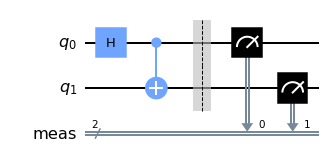

In [89]:
bell_phi_plus = QuantumCircuit(2, name="bell_phi_plus")
bell_phi_plus.h(0)
bell_phi_plus.cx(0, 1)
bell_phi_plus.measure_all()

bell_phi_plus.draw(output='mpl')

__Before measurement:__

$|\Phi^{+}\rangle = |q_{1} q_{0} \rangle = (CNOT_{01})(I_1 \otimes H_0)|00\rangle $

$\implies |\Phi^{+}\rangle = |q_{1} q_{0} \rangle = (CNOT_{01})\bigg(|0\rangle \otimes \frac{|0\rangle + |1\rangle}{\sqrt2}\bigg)$

### $\implies |\Phi^{+}\rangle = \frac{|00 \rangle + |11 \rangle}{\sqrt{2}}$

__After measurement:__

Equal probability (50%) of measuring either the state $|00\rangle$ or the state $|11\rangle$.

2. Circuit for the state $|\Psi^{-}\rangle$:

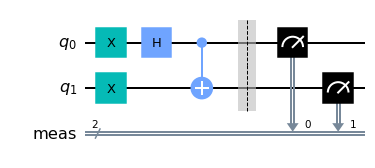

In [90]:
bell_psi_minus = QuantumCircuit(2, name="bell_psi_minus")
bell_psi_minus.x([0,1])
bell_psi_minus.h(0)
bell_psi_minus.cx(0, 1)
bell_psi_minus.measure_all()

bell_psi_minus.draw(output='mpl')

__Before measurement:__

$|\Psi^{-}\rangle = |q_{1} q_{0} \rangle = (CNOT_{01})(I_1 \otimes H_0)(X_1 \otimes X_0)|00\rangle$

$\implies |\Psi^{-}\rangle = |q_{1} q_{0} \rangle = (CNOT_{01})(I_1 \otimes H_0)|11\rangle$ 

$ \implies|\Psi^{-}\rangle = |q_{1} q_{0} \rangle = (CNOT_{01})\bigg(|1\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt2}\bigg)$

### $\implies |\Psi^{-}\rangle = (-1)\frac{|01 \rangle - |10 \rangle}{\sqrt{2}}$

__After measurement:__

Equal probability (50%) of measuring either the state $|01\rangle$ or the state $|10\rangle$.

### Running Quantum Circuits the "traditional" way ...

In [138]:
backends = ['ibmq_qasm_simulator', 
            'ibmq_manila']

In [116]:
# Creating a list of circuits we want to run
circuits = [bell_phi_plus, bell_psi_minus]

circuit_index = 0
for circuit in circuits:
    print("Circuit", circuit_index, "is", circuit.name, "\n")
    
    circuit_index += 1
    
# Choosing the backend and specifying number of shots
backend = provider.get_backend(backends[1])
shots = 1024

# Executing the job.
# A 'job' refers to the execution workflow for the specified circuit(s) 
# on the specified backend, OR a collection of iterative calls to the quantum computer.

job = execute(experiments=circuits, backend=backend, shots=shots)

job_monitor(job)

Circuit 0 is bell_phi_plus 

Circuit 1 is bell_psi_minus 

Job Status: job has successfully run


In [117]:
# Storing the result of the job
result = job.result()

# Extracting the counts from the result
counts = result.get_counts()

You can check the status and detailed information of all your __Circuit jobs__ [here](https://quantum-computing.ibm.com/jobs?jobs=circuit)!

In [118]:
# Printing the measurement counts for the circuits executed

circuit_index = 0
for circuit_counts in counts:
    print("Counts for Circuit", circuit_index, ":")
    print(circuit_counts, "\n")
    
    circuit_index += 1

Counts for Circuit 0 :
{'00': 475, '01': 52, '10': 10, '11': 487} 

Counts for Circuit 1 :
{'00': 11, '01': 499, '10': 478, '11': 36} 



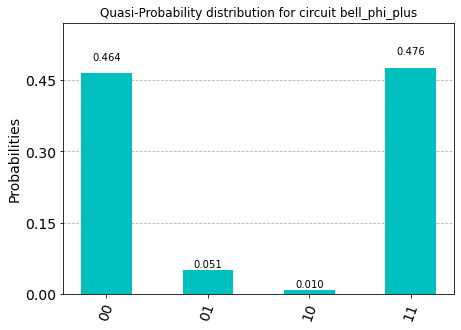

In [119]:
plot_histogram(counts[0], color='c', title="Quasi-Probability distribution for circuit " + circuits[0].name)

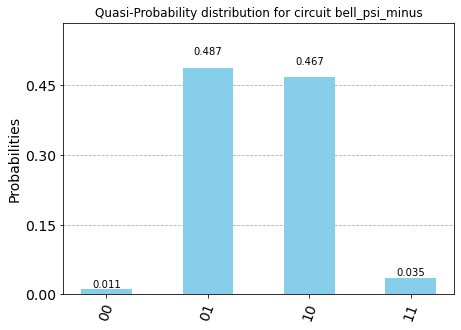

In [120]:
plot_histogram(counts[1], color='skyblue', title="Quasi-Probability distribution for circuit " + circuits[1].name)

### Running Quantum Circuits the "Qiskit Runtime" way ... !

__[Qiskit Runtime Architecture](https://quantum-computing.ibm.com/lab/docs/iql/runtime/)__

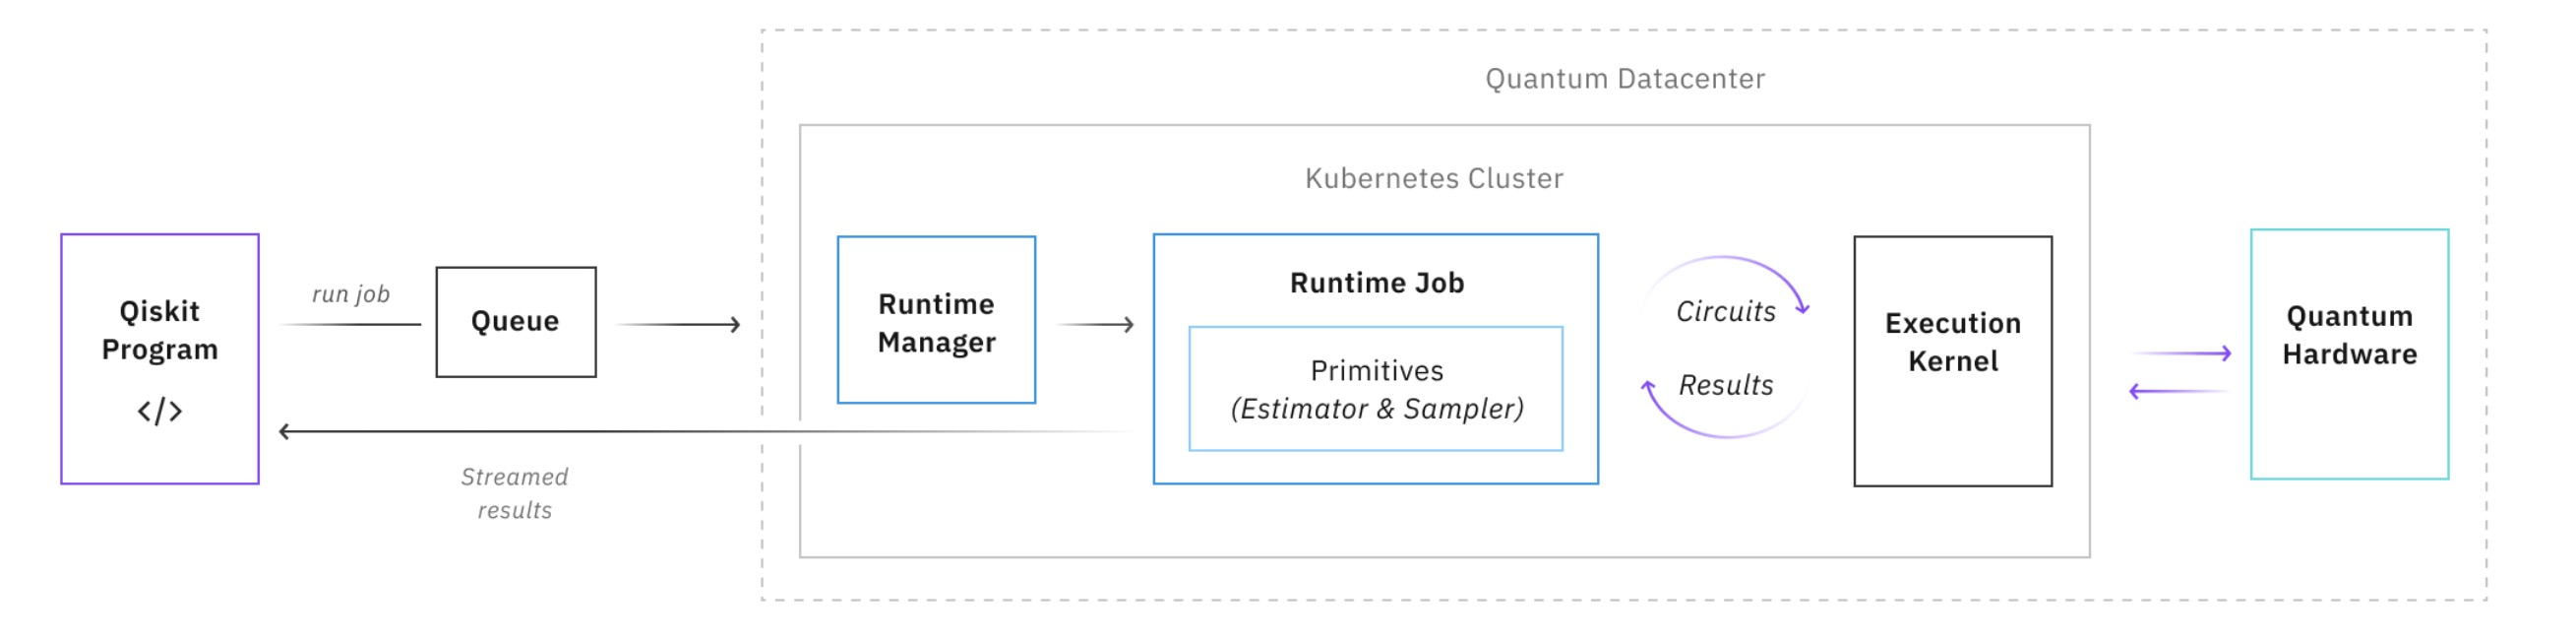

Check out the Runtime Services or __Programs__ (both Primitive and Experimental) in [IBM Quantum Services](https://quantum-computing.ibm.com/services?services=runtime).

*_A 'primitive', in general, is some abstract structure that can be used as a standard approach to solving a problem._

IBM Qiskit has defined the [Sampler Primitive](https://quantum-computing.ibm.com/services?services=runtime&program=sampler) and the [Estimator Primitive](https://quantum-computing.ibm.com/services?services=runtime&program=estimator) for the optimized execution of certain classes of workloads.

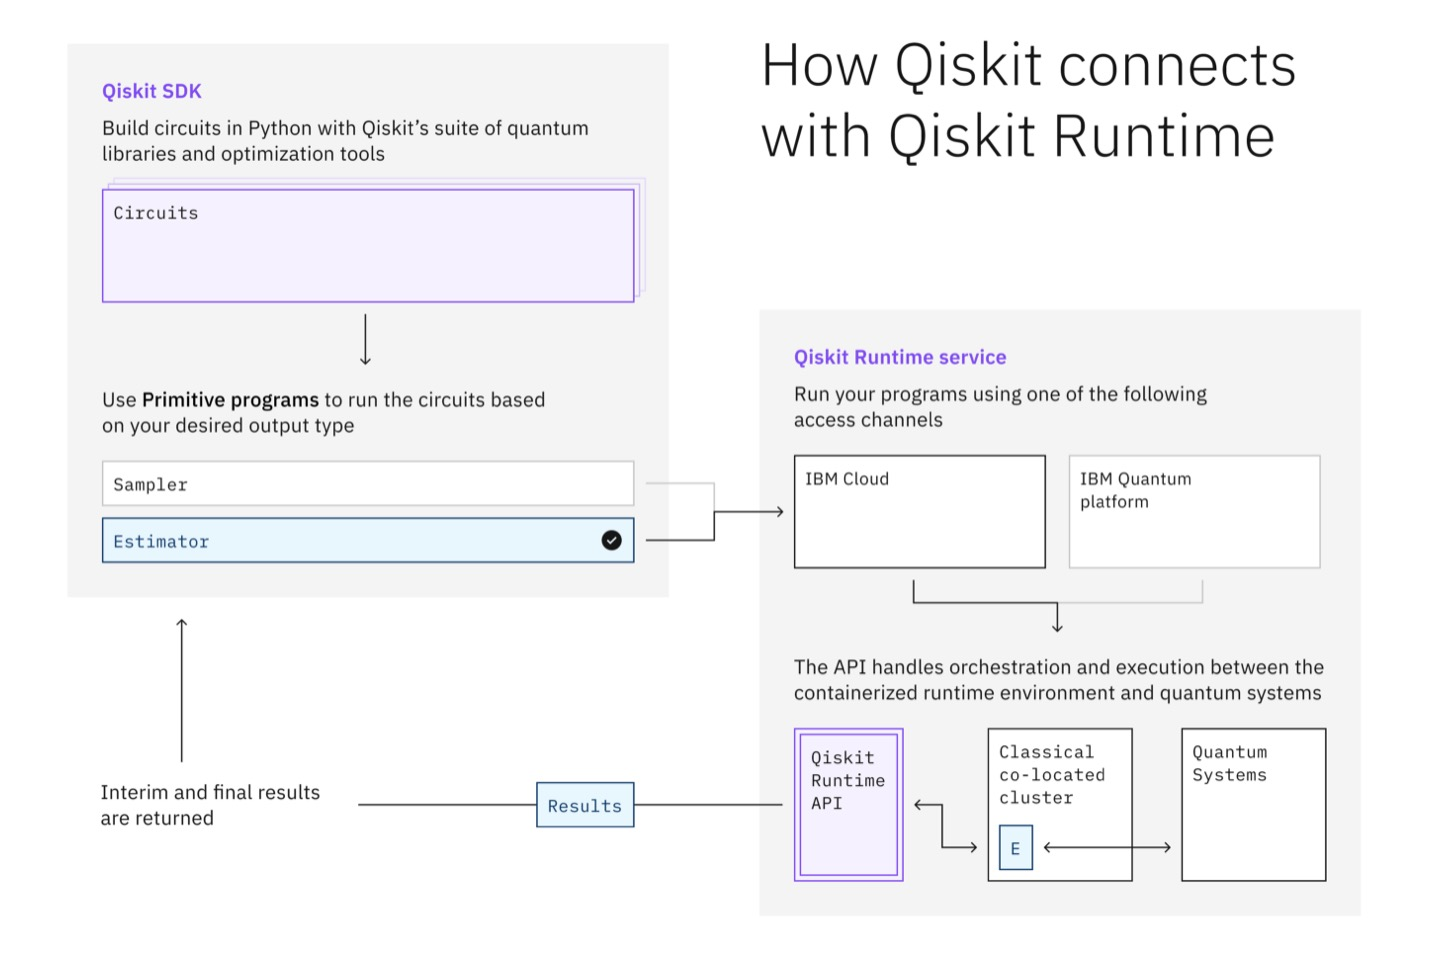

https://medium.com/qiskit/so-what-is-qiskit-runtime-anyway-c78aecf3742

#### [The Sampler Primitive](https://quantum-computing.ibm.com/services?services=runtime&program=sampler)
__Returns the quasi-probability distribution from the measurement outcomes (samplings) of quantum circuits.__

Therefore, __any circuit executed using the Sampler Primitve must explicitly have the measure instructions on all the qubits__.

In [108]:
service = QiskitRuntimeService()

In [348]:
backends = ['ibmq_qasm_simulator',
            'ibmq_manila']

In [349]:
# Creating a list of circuits we want to run
circuits = [bell_phi_plus, bell_psi_minus]

circuit_index = 0
for circuit in circuits:
    print("Circuit", circuit_index, "is", circuit.name, "\n")
    
    circuit_index += 1
    
# Creating a list of circuit indices to run
# Here we are running 'Circuit 0' then 'Circuit 1'
circuit_indices = [0, 1]
    
# Choosing the backend and specifying number of shots
backend = backends[1]
shots = 1024

# executing the bell_phi_plus circuit

with Sampler(circuits=circuits, service=service, options={ "backend": backend}) as sampler:
    # pass indices of circuits
    result = sampler(circuits=circuit_indices, shots=shots)
    # print(result)

Circuit 0 is bell_phi_plus 

Circuit 1 is bell_psi_minus 



You can check the status and detailed information of all your Runtime or __Program jobs__ [here](https://quantum-computing.ibm.com/jobs?jobs=runtime)!

In [350]:
counts = result.quasi_dists

In [351]:
# Printing the measurement counts for the circuits executed

circuit_index = 0
for circuit_counts in counts:
    print("Counts for Circuit", circuit_index, ":")
    print(circuit_counts, "\n")
    
    circuit_index += 1

Counts for Circuit 0 :
{'00': 0.5009765625, '01': 0.0185546875, '10': 0.0439453125, '11': 0.4365234375} 

Counts for Circuit 1 :
{'00': 0.048828125, '01': 0.474609375, '10': 0.4462890625, '11': 0.0302734375} 



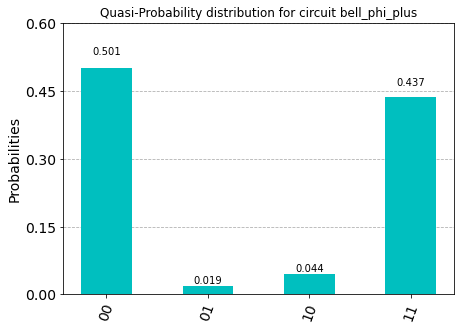

In [352]:
plot_histogram(counts[0], color='c', title="Quasi-Probability distribution for circuit " + circuits[0].name)

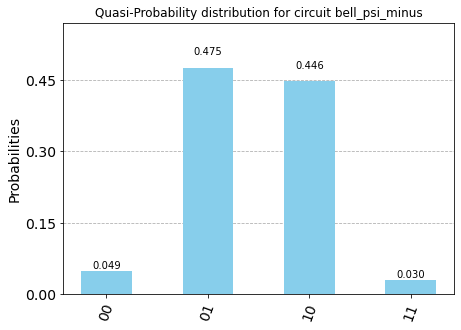

In [353]:
plot_histogram(counts[1], color='skyblue', title="Quasi-Probability distribution for circuit " + circuits[1].name)

#### Demonstrating speedup offered by the Sampler Primitive ... !
We can show that for large workloads, quasi-probability distribution results are obtained significantly faster using Qiskit Runtime's efficient Sampler Primitive as compared to iteratively submitting quantum circuits over the cloud.

The two circuits defined below are the 'Circuit 5' and 'Circuit 6' in [this paper](https://arxiv.org/abs/1905.10876).

One of the features to look for in Quantum Machine Learning applications is to see how _'expressible'_ a Parameterized Quantum Circuit (PQC) is.

Crudly, by _'expressible'_ we mean to say to what extent is a PQC of n-qubits able to explore the $2^n$ dimensional Hilbert Space.

One of the steps involved in finding out the [expressibility](https://arxiv.org/abs/1905.10876) of a PQC is to randomly sample the states generated by the PQC.

__In this exercise, we use this step of randomly sampling a PQC to benchmark the speedup offered by Qiskit Runtime.__

Number of circuit parameters = 28


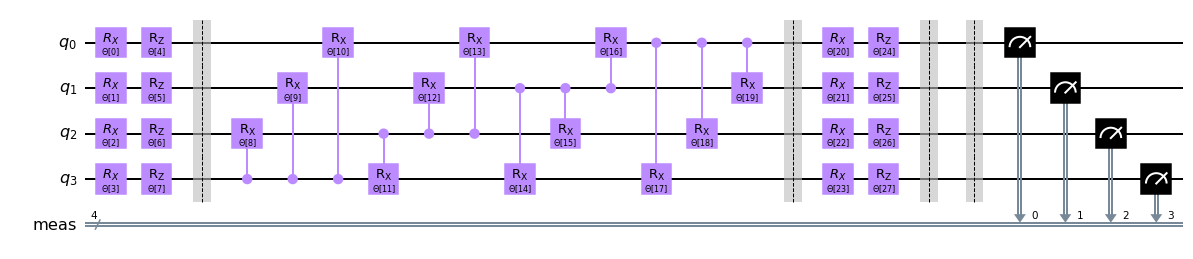

In [247]:
def full_entanglement_rx(num_qubits, layers):
    qubit_indices = range(num_qubits)
    
    entanglement = []
    
    num_parameters = (2*num_qubits + (num_qubits-1)*num_qubits + 2*num_qubits)*layers
    
    theta = ParameterVector('$\Theta$', num_parameters)
    theta_count = 0
    
    ansatz = QuantumCircuit(num_qubits)
    
    for layer in range(layers):
        for qubit in qubit_indices:
            ansatz.rx(theta=theta[theta_count], qubit=qubit, label='$R_{X}$')
            ansatz.rz(phi=theta[theta_count+num_qubits], qubit=qubit)
        
            theta_count = theta_count + 1
        theta_count = theta_count + num_qubits
        
        ansatz.barrier()
    
        for control_qubit in reversed(qubit_indices):
            for target_qubit in reversed(qubit_indices):
            
                if target_qubit != control_qubit:
                    ansatz.crx(theta=theta[theta_count], control_qubit=control_qubit, target_qubit=target_qubit)
                    
                    theta_count = theta_count + 1
                
        ansatz.barrier()
    
        for qubit in qubit_indices:
            ansatz.rx(theta=theta[theta_count], qubit=qubit, label='$R_{X}$')
            ansatz.rz(phi=theta[theta_count+num_qubits], qubit=qubit)
        
            theta_count = theta_count + 1
        theta_count = theta_count + num_qubits
        
        ansatz.barrier()
        
    return ansatz

circuit_rx = full_entanglement_rx(num_qubits=4, layers=1)

# We need to specify the measure_all() instruction to use the Sampler Primitive
circuit_rx.measure_all()

circuit_rx.name = 'circuit_rx'

num_params_rx = circuit_rx.num_parameters
print("Number of circuit parameters =", num_params_rx)

circuit_rx.draw(output='mpl')

Number of circuit parameters = 28


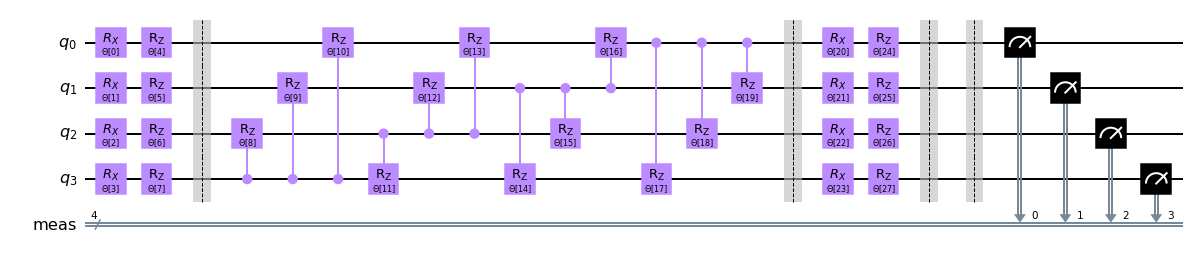

In [248]:
def full_entanglement_rz(num_qubits, layers):
    qubit_indices = range(num_qubits)
    
    entanglement = []
    
    num_parameters = (2*num_qubits + (num_qubits-1)*num_qubits + 2*num_qubits)*layers
    
    theta = ParameterVector('$\Theta$', num_parameters)
    theta_count = 0
    
    ansatz = QuantumCircuit(num_qubits)
    
    for layer in range(layers):
        for qubit in qubit_indices:
            ansatz.rx(theta=theta[theta_count], qubit=qubit, label='$R_{X}$')
            ansatz.rz(phi=theta[theta_count+num_qubits], qubit=qubit)
        
            theta_count = theta_count + 1
        theta_count = theta_count + num_qubits
        
        ansatz.barrier()
    
        for control_qubit in reversed(qubit_indices):
            for target_qubit in reversed(qubit_indices):
            
                if target_qubit != control_qubit:
                    ansatz.crz(theta=theta[theta_count], control_qubit=control_qubit, target_qubit=target_qubit)
                    
                    theta_count = theta_count + 1
                
        ansatz.barrier()
    
        for qubit in qubit_indices:
            ansatz.rx(theta=theta[theta_count], qubit=qubit, label='$R_{X}$')
            ansatz.rz(phi=theta[theta_count+num_qubits], qubit=qubit)
        
            theta_count = theta_count + 1
        theta_count = theta_count + num_qubits
        
        ansatz.barrier()
        
    return ansatz

circuit_rz = full_entanglement_rz(num_qubits=4, layers=1)

# We need to specify the measure_all() instruction to use the Sampler Primitive
circuit_rz.measure_all()

circuit_rz.name = 'circuit_rz'

num_params_rz = circuit_rz.num_parameters
print("Number of circuit parameters =", num_params_rz)

circuit_rz.draw(output='mpl')

In [365]:
backends = ['ibmq_qasm_simulator',
            'ibmq_manila']

In [366]:
# Creating a list of circuits we want to run
circuits = [circuit_rx, circuit_rz]
circ_list_len = len(circuits)

circuit_index = 0
for circuit in circuits:
    print("Circuit", circuit_index, "is", circuit.name, "\n")
    
    circuit_index += 1

    
# num_samples is the number of samples (or quasi-probability distributions) for each circuit
# each 'sample' consists of 'shots' number of measurements 
num_samples = 20
shots = 1024

    
# Choosing the backend and specifying number of shots
backend_qasm = backends[0]
backend_manila = backends[1]

Circuit 0 is circuit_rx 

Circuit 1 is circuit_rz 



__Qiskit Circuit Execution__ 
1. __qasm simulator__

In [260]:
backend_circ = provider.get_backend(backend_qasm)

var = circuit_rx.parameters

circuit_rx_transpiled = transpile(circuit_rx, backend=backend_circ)

current_time = time.time()

counts_rx = []
for sample in range(num_samples):
    circuit_rx_assigned = circuit_rx_transpiled.assign_parameters({var[i]: uniform(low=0.0, high=2*pi) for i in range(num_params_rx)}, inplace=False)
    result_rx_qasm = execute(circuit_rx_assigned, backend=backend_circ, shots=shots).result()

    counts_rx.append(result_rx_qasm.get_counts(circuit_rx_assigned))
    
execution_time_rx_qasm = time.time() - current_time

print("Execution Time for", num_samples, "samples of circuit_rx =", execution_time_rx_qasm, "seconds")

Execution Time for 20 samples of circuit_rx = 275.8942549228668 seconds


In [265]:
backend_circ = provider.get_backend(backend_qasm)

var = circuit_rz.parameters

circuit_rz_transpiled = transpile(circuit_rz, backend=backend_circ)

current_time = time.time()

counts_rz = []
for sample in range(num_samples):
    circuit_rz_assigned = circuit_rz_transpiled.assign_parameters({var[i]: uniform(low=0.0, high=2*pi) for i in range(num_params_rz)}, inplace=False)
    result_rz_qasm = execute(circuit_rz_assigned, backend=backend_circ, shots=shots).result()

    counts_rz.append(result_rz_qasm.get_counts(circuit_rz_assigned))
    
execution_time_rz_qasm = time.time() - current_time

print("Execution Time for", num_samples, "samples of circuit_rz =", execution_time_rz_qasm, "seconds")

Execution Time for 20 samples of circuit_rz = 512.282044172287 seconds


__Qiskit Circuit Execution__ 

2. __ibmq_manila system__

In [260]:
backend_circ = provider.get_backend(backend_manila)

var = circuit_rx.parameters

circuit_rx_transpiled = transpile(circuit_rx, backend=backend_circ)

current_time = time.time()

counts_rx = []
for sample in range(num_samples):
    circuit_rx_assigned = circuit_rx_transpiled.assign_parameters({var[i]: uniform(low=0.0, high=2*pi) for i in range(num_params_rx)}, inplace=False)
    result_rx_manila = execute(circuit_rx_assigned, backend=backend_circ, shots=shots).result()

    counts_rx.append(result_rx_manila.get_counts(circuit_rx_assigned))
    
execution_time_rx_manila = time.time() - current_time

print("Execution Time for", num_samples, "samples of circuit_rx =", execution_time_rx_manila, "seconds")

Execution Time for 20 samples of circuit_rx = 275.8942549228668 seconds


In [369]:
backend_circ = provider.get_backend(backend_manila)

var = circuit_rz.parameters

circuit_rz_transpiled = transpile(circuit_rz, backend=backend_circ)

current_time = time.time()

counts_rz = []
for sample in range(num_samples):
    circuit_rz_assigned = circuit_rz_transpiled.assign_parameters({var[i]: uniform(low=0.0, high=2*pi) for i in range(num_params_rz)}, inplace=False)
    result_rz_manila = execute(circuit_rz_assigned, backend=backend_circ, shots=shots).result()

    counts_rz.append(result_rz_manila.get_counts(circuit_rz_assigned))
    
execution_time_rz_manila = time.time() - current_time

print("Execution Time for", num_samples, "samples of circuit_rz =", execution_time_rz_manila, "seconds")

Execution Time for 20 samples of circuit_rz = 1359.905534029007 seconds


You can check the status and detailed information of all your __Circuit jobs__ [here](https://quantum-computing.ibm.com/jobs?jobs=circuit)!

__Qiskit Runtime Sampler Execution__
1. __qasm simulator__

In [245]:
# Creating a list of circuit indices to run
# Here we are running 'Circuit 0', then 'Circuit 1' both 'num_samples' times

circuit_indices = []
for i in range(circ_list_len):
    circuit_indices += [i]*num_samples

# Creating list of uniform random Parameter Vectors
# 'num_params_rx = num_params_rz' in this case
theta = [[uniform(0, 2*pi) for param in range(num_params_rx)] for sample in range(num_samples*circ_list_len)]
#print(theta)

current_time = time.time()

with Sampler(circuits=circuits, service=service, options={ "backend": backend_qasm}) as sampler:
    # pass indices of circuits
    result_sampler_qasm = sampler(circuits=circuit_indices, shots=shots, parameter_values=theta)
    # print(result)
    
execution_time_sampler_qasm = time.time() - current_time

print("Total Execution Time for", num_samples, "samples of both circuit_rx and circuit_rz =", execution_time_sampler_qasm, "seconds")

Total Execution Time for 20 samples of both circuit_rx and circuit_rz = 9.460642099380493 seconds


__Qiskit Runtime Sampler Execution__

   2. __ibmq_manila system__

In [277]:
# Creating a list of circuit indices to run
# Here we are running 'Circuit 0', then 'Circuit 1' both 'num_samples' times

circuit_indices = []
for i in range(circ_list_len):
    circuit_indices += [i]*num_samples

# Creating list of uniform random Parameter Vectors
# 'num_params_rx = num_params_rz' in this case

theta = [[uniform(0, 2*pi) for param in range(num_params_rx)] for sample in range(num_samples*circ_list_len)]
#print(theta)

current_time = time.time()

with Sampler(circuits=circuits, service=service, options={ "backend": backend_manila}) as sampler:
    # pass indices of circuits
    result_sampler_manila = sampler(circuits=circuit_indices, shots=shots, parameter_values=theta)
    # print(result)
    
execution_time_sampler_manila = time.time() - current_time

print("Total Execution Time for", num_samples, "samples of both circuit_rx and circuit_rz =", execution_time_sampler_manila, "seconds")

Total Execution Time for 20 samples of both circuit_rx and circuit_rz = 41.106927156448364 seconds


You can check the status and detailed information of all your Runtime or __Program jobs__ [here](https://quantum-computing.ibm.com/jobs?jobs=runtime)!

__Comparing execution times to observe speedup from Qiskit Rumtime Sampler Primitive__

We define ___speedup___ as the ratio of the __Execution time for circuit execution__ to the __Execution time in Runtime Sampler Primitive__, for a specified backend for circuit_rx and circuit_rz.

__Qiskit Circuit Execution using the following backends:__
1. __qasm simulator__

In [303]:
print("Execution Time for", num_samples, "samples of circuit_rx =", execution_time_rx_qasm, "seconds")
print("Execution Time for", num_samples, "samples of circuit_rz =", execution_time_rz_qasm, "seconds")

total_time_qasm = execution_time_rx_qasm + execution_time_rz_qasm
print("\nCombined Execution Time = ", total_time_qasm, "seconds =", total_time_qasm/60, "minutes")

Execution Time for 20 samples of circuit_rx = 275.8942549228668 seconds
Execution Time for 20 samples of circuit_rz = 512.282044172287 seconds

Combined Execution Time =  788.1762990951538 seconds = 13.136271651585897 minutes


2. __ibmq_manila system__

In [385]:
print("Execution Time for", num_samples, "samples of circuit_rx =", execution_time_rx_manila, "seconds")
print("Execution Time for", num_samples, "samples of circuit_rz =", execution_time_rz_manila, "seconds")

total_time_manila = execution_time_rx_manila + execution_time_rz_manila
print("\nCombined Execution Time = ", total_time_manila, "seconds =", total_time_manila/60, "minutes")

Execution Time for 20 samples of circuit_rx = 275.8942549228668 seconds
Execution Time for 20 samples of circuit_rz = 1359.905534029007 seconds

Combined Execution Time =  1635.7997889518738 seconds = 27.263329815864562 minutes


__Qiskit Runtime Sampler Execution using the following backends:__
1. __qasm simulator__

In [397]:
print("Execution Time for", num_samples, "samples of both circuit_rx & circuit_rz =", execution_time_sampler_qasm, "seconds")

print("\nAs compared to", total_time_qasm, "seconds for \"traditional\" circuit execution on qasm.")

print("\nTherefore, a speedup of about " + str(round(total_time_qasm/execution_time_sampler_qasm)) + "x!")

Execution Time for 20 samples of both circuit_rx & circuit_rz = 9.460642099380493 seconds

As compared to 788.1762990951538 seconds for "traditional" circuit execution on qasm.

Therefore, a speedup of about 83x!


2. __ibmq_manila system__

In [399]:
print("Execution Time for", num_samples, "samples of both circuit_rx & circuit_rz =", execution_time_sampler_manila, "seconds")

print("\nAs compared to", total_time_manila, "seconds for \"traditional\" circuit execution on qasm.")

print("\nTherefore, a speedup of about " + str(round(total_time_manila/execution_time_sampler_manila)) + "x!")

Execution Time for 20 samples of both circuit_rx & circuit_rz = 41.106927156448364 seconds

As compared to 1635.7997889518738 seconds for "traditional" circuit execution on qasm.

Therefore, a speedup of about 40x!


#### [The Estimator Primitive](https://quantum-computing.ibm.com/services?services=runtime&program=estimator)
__Returns the expectation value of quantum operators with respect to the states obtained from the measurement outcomes (samplings) of quantum circuits.__

The exepectation value of an observable described by some $2^{n} \times 2^{n}$ Hermitian operator ($H$) is defined with respect to an n-qubit quantum state $\big(| \psi \rangle \big)$ as follows:

$ \langle H \rangle = \langle \psi | H | \psi \rangle$

$|\psi\rangle$ may be parameterized. Therefore, $|\psi\rangle := |\psi(\theta)\rangle$ in general, where $\theta$ is a vector of parameters.

Evaluating $ \langle H \rangle $ on a quantum circuit is not as straightforward as it appears mathematically.

The operator ($H$) needs to be decompsed into [___Pauli Strings___](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Pauli.html). 

Pauli String: $P_{P_{n-1} , ... , P_{0}}^{q} = (-i)^{q} P_{n-1} \otimes ... \otimes P_{0}$ where $q \in \mathbb{Z}_{4}$ and $P_{i} \in \{ I, X, Y, Z \}$

Therefore, $H = \sum_{q = 0}^{4} \sum_{i = 0}^{4^{n}} w_{i}^{q} P_{P_{n-1} , ... , P_{0}}^{q}$


The measurements then need to be performed in different bases (as characterised by each Pauli String), to get the expectation values of these Pauli Strings.

Finally, the results need to be combined taking into account the weights ($w_{i}^{q}$) of each Pauli Strings to obtain $\langle H \rangle$.

__Hybrid Quantum Classical (HQC) Computation__

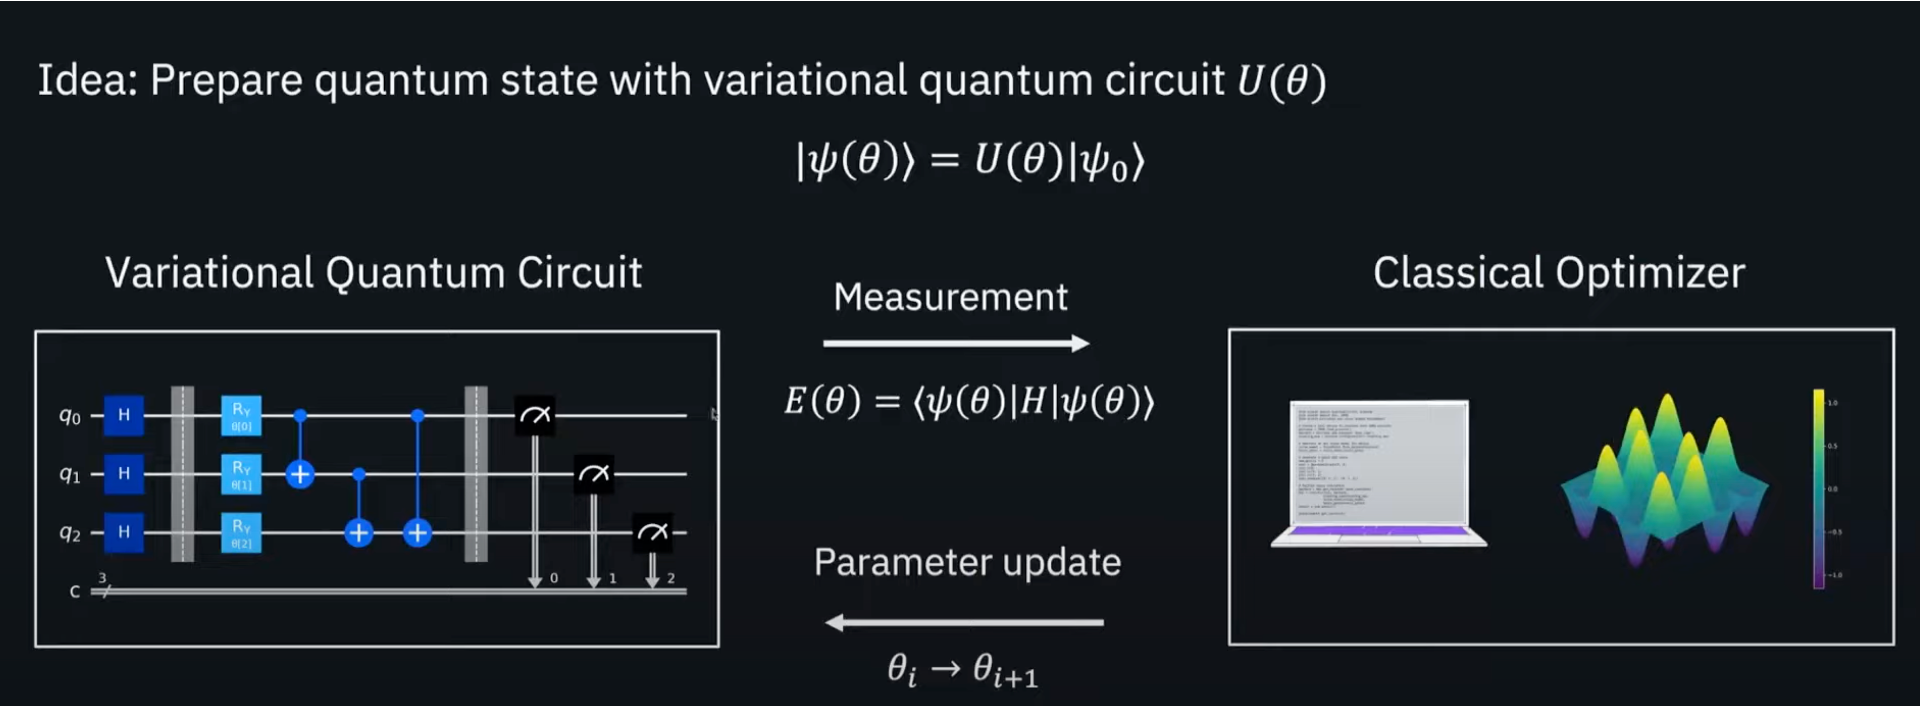

https://learn.qiskit.org/summer-school/2021/lec5-2-introduction-quantum-approximate-optimization-algorithm-applications

__The Estimator Program Primitve__ in Qiskit Runtime abstracts away the Pauli String decomposition and recombination from the user, since details for these calculations are defined and standardized by the Estimator.

Example from [here](https://quantum-computing.ibm.com/services?services=runtime&program=estimator).

In [404]:
psi1 = RealAmplitudes(num_qubits=2, reps=2)
psi2 = RealAmplitudes(num_qubits=2, reps=3)

H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H2 = SparsePauliOp.from_list([("IZ", 1)])
H3 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

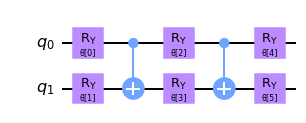

In [406]:
psi1.decompose().draw(output='mpl')

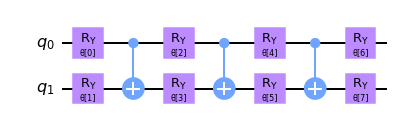

In [407]:
psi2.decompose().draw(output='mpl')

In [428]:
with Estimator(circuits=[psi1, psi2],
               observables=[H1, H2, H3],
               service=service,
               options={ "backend": "ibmq_qasm_simulator" }) as estimator:
    
    theta1 = [0, 1, 1, 2, 3, 5]
    theta2 = [0, 1, 1, 2, 3, 5, 8, 13]
    theta3 = [1, 2, 3, 4, 5, 6]

    # calculate [ <psi1(theta1)|H1|psi1(theta1)>,
    #             <psi2(theta2)|H2|psi2(theta2)>,
    #             <psi1(theta3)|H3|psi1(theta3)> ]
    
    psi12_H23_result = estimator(circuits=[0, 1, 0], observables=[0, 1, 2], parameter_values=[theta1, theta2, theta3])
    
    # print(psi12_H23_result)

Therefore, $ \langle H_{1} \rangle = \langle \psi_{1}(\theta_{1})|H_{1}| \psi_{1}(\theta_{1}) \rangle$

In [429]:
print("<H1> =", psi12_H23_result.values[0])

<H1> = 1.58203125


Therefore, $ \langle H_{2} \rangle = \langle \psi_{2}(\theta_{2})|H_{2}| \psi_{2}(\theta_{2}) \rangle$

In [430]:
print("<H2> =", psi12_H23_result.values[1])

<H2> = 0.1953125


Therefore, $ \langle H_{3} \rangle = \langle \psi_{1}(\theta_{3})|H_{3}| \psi_{1}(\theta_{3}) \rangle$

In [431]:
print("<H3> =", psi12_H23_result.values[2])

<H3> = -1.12109375


### __Further Reading__
* [120x speedup on molecular simulation using Qiskit Runtime](https://research.ibm.com/blog/120x-quantum-speedup)

* [Explore the Experimental Runtime Programs as well!](https://quantum-computing.ibm.com/services?services=runtime) (e.g. [vqe](https://quantum-computing.ibm.com/services?services=runtime&program=vqe), [qaoa](https://quantum-computing.ibm.com/services?services=runtime&program=qaoa), [circuit-runner](https://quantum-computing.ibm.com/services?services=runtime&program=circuit-runner))

* [Create custom Runtime Programs](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/05_uploading_program.html)


* [Qiskit Runtime Primitives blog](https://research.ibm.com/blog/qiskit-runtime-for-useful-quantum-computing)
* [Quantum Serverless](https://research.ibm.com/blog/quantum-serverless-programming)

### Thank you ... !

In [438]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

'0.5.0'

In [439]:
import qiskit.tools.jupyter

%qiskit_version_table